# IMPORTING  LIBRARIES.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING THE DATASET.

In [3]:
data=pd.read_excel(r"C:\Users\pc\OneDrive\Desktop\REDWINE DATASET.xlsx")



# IMPLEMENTING NAIVE BAYES ALGORITM ON THE GIVEN DATASET.
1. posterior = final answer with respect to one class.
2. prior     = probability of the given class.
3. class conditional = probability of Xi give the data point belong to the given class.


In [4]:
# CREATING THE CLASS FOR NAIVE BAYES CLASSIFIER.
class Naive_Bayes:
    def __init__(self):
        pass
    # FIT FUNCTION IS CREATED TO FIND THE MEAN, VARIANCE AND PRIORS OF EACH UNIQUE CLASS OF THE DATASET WHICH WE WILL BE USING FOR CALULATING THE GAUSSIN PROBABILIY.
    def fit(self,x,y):
        # FINDING DIMENSIONS OF DATA.
        samples,features=x.shape
        # FINDIG THE UNIQUE LABELS
        self.classes=np.unique(y)
        # TOTAL NUMBER OF UNIQUE LABELS
        self.no_of_classes=len(self.classes)
        # 2D NUMPY ARRAY FOR MEAN , VARIANCE
        self.mean=np.zeros((self.no_of_classes,features))
        self.variance=np.zeros((self.no_of_classes,features))
        #1D NUMPY ARRAY FOR PRIORS.
        self.priors=np.zeros(self.no_of_classes)
        # FOR LOOP TO FIND MEAN,VARIANCE AND PRIORS OF EACH CLASS.
        for idx , c in enumerate(self.classes):
            
            X1=x[y==c]
            self.mean[idx,:]=X1.mean(axis=0)
            self.variance[idx,:]=X1.var(axis=0)
            self.priors[idx]=X1.shape[0]/samples
            print(X1.shape[0])
    # PREDICT FUCNTION TO FIND THE PREDICTED LABELS ON THE TEST DATASET.
    def predictions(self,x):
        # EMPTY LIST TO STORE THE PREDICTED LABELS.
        y_predicted=[]
        for i in x:
            # CALLING THE FUNCTION TO FIND THE PREDICTED LABELS
            a=self.cal_pred(i)
            y_predicted.append(a)
        return(y_predicted)
     # FUNCTION WHICH FIND THE PREDICTED LABELS FOR GIVEN DATAPOINT AS THE INPUT FROM THE predic() FUNCTION.
    def cal_pred(self,datapoint):
        # CREATING EMPTY LIST FOR FINDING THE POSTERIORS i.e. PROBABILITY OF DATAPOINT TO BELONG TO CERTAIN CLASS.
        posteriors=[]
        for idx , c in enumerate(self.classes):
            prior=np.log(self.priors[idx])
            class_conditional=np.sum(np.log(self.Gaussian_Naive_Bayes(idx,datapoint)+1e-1)) # I HAVE ADDED A SMALL NUMBER AS VALUE INPUT TO LOG WAS BECOMMING VERY SMALL THUS CAUSING 0/0 TYPE ERROR.
            posterior=prior+class_conditional
            posteriors.append(posterior)
        # RETURN THE CLASS WHICH HAS THE MAXIMUM PROBABILITY.
        return(self.classes[np.argmax(posteriors)])
    # FUNCTION WHICH IS USED TO APPLY GAUSSIAN FORMULA.
    def Gaussian_Naive_Bayes(self,idx,x):
        mean=self.mean[idx]
        variance=self.variance[idx]
        n=np.exp(-((x-mean)**2)/(2*variance))
        d=np.sqrt(2*3.14*variance)
        return(n/d)
    
# FUNCTION TO CALCULATE THE ACCURACY.
def accuracy(y_pred,y):
    accuracy=np.sum(y_pred==y)/len(y)
    print(accuracy*100)            

# SPLITTING DATASET INTO 80:20 RATIO.

In [5]:
import random
split_index=int(len(data)*0.80)

data_train=data[:split_index]
data_test=data[split_index:]
X_train=data_train.drop('quality',axis=1)
Y_train=data_train['quality']
X_test=data_test.drop('quality',axis=1)
Y_test=data_test['quality']

# DETERMINING THE ACCURACY OF MODEL (NORMALIZING WITH MAX AND MIN)

In [6]:
columns=data.drop('quality',axis=1).columns.tolist()
for i in columns:
    X_train[str(i)]=(X_train[str(i)]-min(X_train[str(i)]))/(max(X_train[str(i)])-min(X_train[str(i)]))
for i in columns:
    X_test[str(i)]=(X_test[str(i)]-min(X_test[str(i)]))/(max(X_test[str(i)])-min(X_test[str(i)]))    
a=Naive_Bayes()
a.fit(np.array(X_train),np.array(Y_train))
y_pred=a.predictions(np.array(X_test))
accuracy(np.array(y_pred),np.array(Y_test))



44.0625


# DETERMINING THE ACCURACY OF MODEL (NORMALIZING WITH MEAN AND STANDARD DEVIATION)

In [7]:
pip install scikit-plot==0.3.7

In [8]:
import statistics as stats
columns=data.drop('quality',axis=1).columns.tolist()
for i in columns:
    X_train[str(i)]=(X_train[str(i)]-stats.mean(X_train[str(i)]))/(stats.stdev(X_train[str(i)]))
for i in columns:
    X_test[str(i)]=(X_test[str(i)]-stats.mean(X_test[str(i)]))/(stats.stdev(X_test[str(i)]))   
a=Naive_Bayes()
a.fit(np.array(X_train),np.array(Y_train))
y_pred=a.predictions(np.array(X_test))
accuracy(np.array(y_pred),np.array(Y_test))

61.25000000000001


# VISUALIZING THE PERFORMANCE OF THE MODEL ON THE BASIS OF VARIOUS EVALUATION METRICS.

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

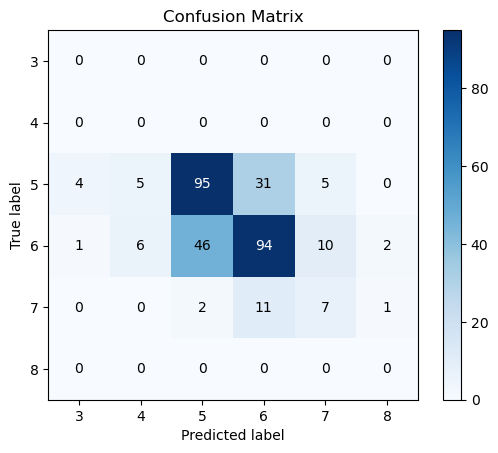

In [9]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_pred,Y_test)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_pred,Y_test)
confusion_matrix

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 4,  5, 95, 31,  5,  0],
       [ 1,  6, 46, 94, 10,  2],
       [ 0,  0,  2, 11,  7,  1],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

In [50]:
PRECISION={}
RECALL={}
ACCURACY={}
F1_SCORE={}
for i in range(confusion_matrix.shape[0]):
    TP=confusion_matrix[i,i]
    FP=confusion_matrix[i,:].sum()-TP
    FN=confusion_matrix[:,i].sum()-TP
    TN=confusion_matrix.sum().sum()-TP-FP-FN
    if TP==0 and FP==0:
        ACCURACY[i]=(TP+TN)/confusion_matrix.sum().sum()
        PRECISION[i]=0
        RECALL[i]=TP/(TP+FN)
        F1_SCORE[i]=0
    else:
        ACCURACY[i]=(TP+TN)/confusion_matrix.sum().sum()
        PRECISION[i]=TP/(TP+FP)
        RECALL[i]=TP/(TP+FN)
        F1_SCORE[i]=(2*PRECISION[i]*RECALL[i])/(PRECISION[i]+RECALL[i])


In [96]:
A=ACCURACY.values()
R=RECALL.values()
P=PRECISION.values()
F1=F1_SCORE.values()

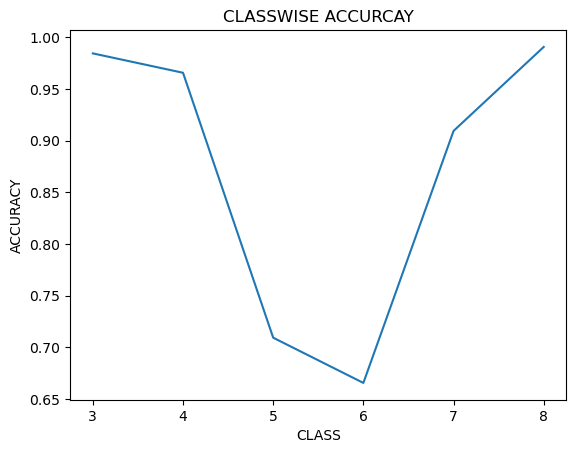

In [110]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(A)))
plt.title('CLASSWISE ACCURCAY')
plt.xlabel('CLASS')
plt.ylabel('ACCURACY')

plt.show()

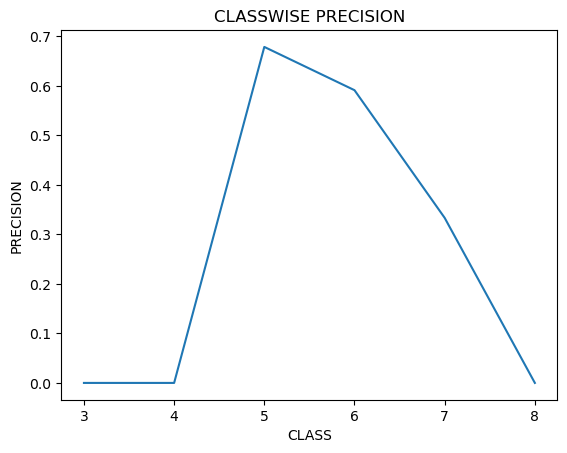

In [112]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(P)))
plt.title('CLASSWISE PRECISION')
plt.xlabel('CLASS')
plt.ylabel('PRECISION')
plt.show()

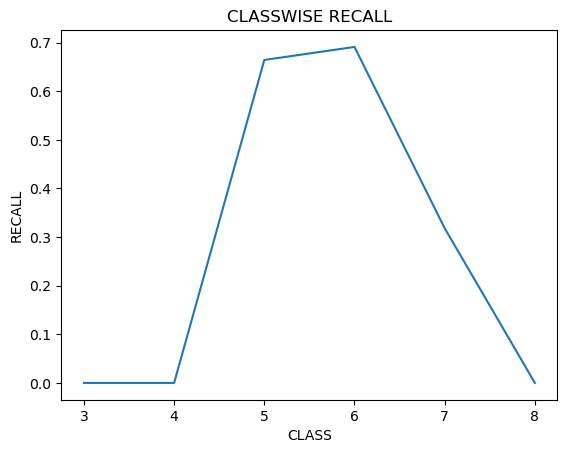

In [113]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(R)))
plt.title('CLASSWISE RECALL')
plt.xlabel('CLASS')
plt.ylabel('RECALL')
plt.show()

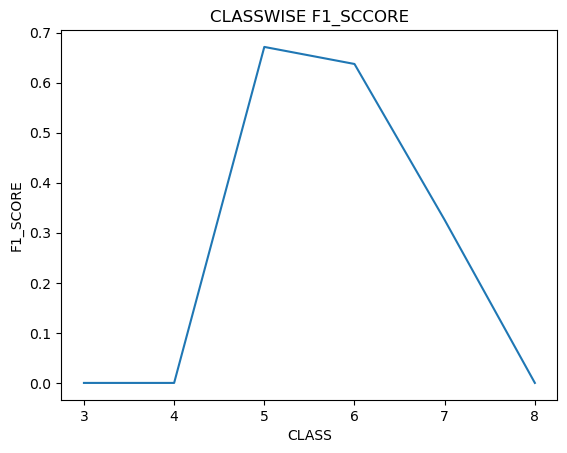

In [114]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(F1)))
plt.title('CLASSWISE F1_SCCORE')
plt.xlabel('CLASS')
plt.ylabel('F1_SCORE')
plt.show()